In [11]:
# Importación de librerías 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def generate_random_data(size=10):
    """Genera un array de datos aleatorios."""
    return np.random.rand(size)

def create_dataframe(data):
    """Crea un DataFrame de pandas a partir de los datos proporcionados."""
    return pd.DataFrame(data, columns=['Valores'])

def load_dataset(filepath):
    """Carga el dataset desde un archivo CSV."""
    try:
        dataset = pd.read_csv(filepath)
        print(f"Dataset cargado exitosamente desde {filepath}.")
        return dataset
    except FileNotFoundError:
        print(f"Error: El archivo no se encuentra en la ruta {filepath}.")
        return None

def dataset_info(dataset):
    """Muestra información básica del dataset."""
    print("\nPrimeras filas del dataset:")
    print(dataset.head())
    
    print("\nÚltimas filas del dataset:")
    print(dataset.tail())
    
    print("\nInformación del dataset:")
    print(dataset.info())
    
    #print("\nValores nulos por columna:")
    #print(dataset.isnull().sum())
    
    print("\nEstadísticas descriptivas:")
    print(dataset.describe())
    
    print("\nColumnas del dataset:")
    print(dataset.columns)

def rename_columns(dataset):
    """Renombra las columnas del dataset al español."""
    column_mapping = {
        'country': 'Pais',
        'year': 'Año',
        'iso_code': 'Código ISO',
        'population': 'Poblacion',
        'gdp': 'PIB',
        'biofuel_cons_change_pct': 'Cambio porcentual en el consumo de biocombustibles',
        'biofuel_cons_change_twh': 'Consumo de biocombustibles medido en teravatios-hora (TWh)',
        'biofuel_cons_per_capita': 'Consumo de biocombustibles por persona',
        'biofuel_consumption': 'Consumo total de biocombustibles',
        'biofuel_elec_per_capita': 'Electricidad generada a partir de biocombustibles por persona',
        'biofuel_electricity': 'Electricidad generada a partir de biocombustibles',
        'biofuel_share_elec': 'Proporción de la energía de biocombustibles en la producción total de electricidad',
        'biofuel_share_energy': 'Participación de la energía de biocombustibles en el consumo total de energía',
        'carbon_intensity_elec': 'Intensidad de carbono de la electricidad',
        'coal_cons_change_pct': 'Cambio porcentual en el consumo de carbón',
        'coal_cons_change_twh': 'Cambio en el consumo de carbón medido en teravatios-hora (TWh)',
        'coal_cons_per_capita': 'Consumo de carbón por persona',
        'coal_consumption': 'Consumo total de carbón',
        'coal_elec_per_capita': 'Electricidad generada a partir de carbón por persona',
        'coal_electricity': 'Electricidad generada a partir de carbón',
        'coal_prod_change_pct': 'Cambio porcentual en la producción de carbón',
        'coal_prod_change_twh': 'Cambio en la producción de carbón medido en teravatios-hora (TWh)',
        'coal_prod_per_capita': 'Producción de carbón por persona',
        'coal_production': 'Producción total de carbón',
        'coal_share_elec': 'Proporción de carbón en la producción total de electricidad',
        'coal_share_energy': 'Participación del carbón en el consumo total de energía',
        'electricity_demand': 'Demanda de electricidad',
        'electricity_demand_per_capita': 'Demanda de electricidad por persona',
        'electricity_generation': 'Generación de electricidad',
        'electricity_share_energy': 'Participación de la electricidad en el consumo total de energía',
        'energy_cons_change_pct': 'Cambio porcentual en el consumo de energía',
        'energy_cons_change_twh': 'Cambio en el consumo de energía medido en teravatios-hora (TWh)',
        'energy_per_capita': 'Energía consumida por persona',
        'energy_per_gdp': 'Energía consumida por PIB',
        'fossil_cons_change_pct': 'Cambio porcentual en el consumo de fósiles',
        'fossil_cons_change_twh': 'Cambio en el consumo de fósiles medido en teravatios-hora (TWh)',
        'fossil_elec_per_capita': 'Electricidad generada a partir de fósiles por persona',
        'fossil_electricity': 'Electricidad generada a partir de fósiles',
        'fossil_energy_per_capita': 'Cantidad de energía fósil disponible o generada por persona',
        'fossil_fuel_consumption': 'Consumo total de combustibles fósiles',
        'fossil_share_elec': 'Proporción de fósiles en la producción total de electricidad',
        'fossil_share_energy': 'Participación de fósiles en el consumo total de energía',
        'gas_cons_change_pct': 'Cambio porcentual en el consumo de gas',
        'gas_cons_change_twh': 'Cambio en el consumo de gas medido en teravatios-hora (TWh)',
        'gas_consumption': 'Consumo total de gas',
        'gas_elec_per_capita': 'Electricidad generada a partir de gas por persona',
        'gas_electricity': 'Electricidad generada a partir de gas',
        'gas_energy_per_capita': 'Cantidad de energía de gas disponible o generada por persona',
        'gas_prod_change_pct': 'Cambio porcentual en la producción de gas',
        'gas_prod_change_twh': 'Cambio en la producción de gas medido en teravatios-hora (TWh)',
        'gas_prod_per_capita': 'Producción de gas por persona',
        'gas_production': 'Producción total de gas',
        'gas_share_elec': 'Proporción de gas en la producción total de electricidad',
        'gas_share_energy': 'Participación del gas en el consumo total de energía',
        'greenhouse_gas_emissions': 'Emisiones de gases de efecto invernadero',
        'hydro_cons_change_pct': 'Cambio porcentual en el consumo de hidroeléctrico',
        'hydro_cons_change_twh': 'Cambio en el consumo de hidroeléctrico medido en teravatios-hora (TWh)',
        'hydro_consumption': 'Consumo total de energía hidroeléctrica',
        'hydro_elec_per_capita': 'Electricidad generada a partir de hidroeléctrico por persona',
        'hydro_electricity': 'Electricidad generada a partir de energía hidroeléctrica',
        'hydro_energy_per_capita': 'Cantidad de energía hidroeléctrica disponible o generada por persona',
        'hydro_share_elec': 'Proporción de la energía hidroeléctrica en la producción total de electricidad',
        'hydro_share_energy': 'Participación de la energía hidroeléctrica en el consumo total de energía',
        'low_carbon_cons_change_pct': 'Cambio porcentual en el consumo de energías de bajo carbono',
        'low_carbon_cons_change_twh': 'Cambio en el consumo de energías de bajo carbono medido en teravatios-hora (TWh)',
        'low_carbon_consumption': 'Consumo total de energías de bajo carbono',
        'low_carbon_elec_per_capita': 'Electricidad generada a partir de energías de bajo carbono por persona',
        'low_carbon_electricity': 'Electricidad generada a partir de energías de bajo carbono',
        'low_carbon_energy_per_capita': 'Cantidad de energía de bajo carbono disponible o generada por persona',
        'low_carbon_share_elec': 'Proporción de energías de bajo carbono en la producción total de electricidad',
        'low_carbon_share_energy': 'Participación de energías de bajo carbono en el consumo total de energía',
        'net_elec_imports': 'Importaciones netas de electricidad',
        'net_elec_imports_share_demand': 'Participación de las importaciones netas de electricidad en la demanda',
        'nuclear_cons_change_pct': 'Cambio porcentual en el consumo de energía nuclear',
        'nuclear_cons_change_twh': 'Cambio en el consumo de energía nuclear medido en teravatios-hora (TWh)',
        'nuclear_consumption': 'Consumo total de energía nuclear',
        'nuclear_elec_per_capita': 'Electricidad generada a partir de energía nuclear por persona',
        'nuclear_electricity': 'Electricidad generada a partir de energía nuclear',
        'nuclear_energy_per_capita': 'Cantidad de energía nuclear disponible o generada por persona',
        'nuclear_share_elec': 'Proporción de energía nuclear en la producción total de electricidad',
        'nuclear_share_energy': 'Participación de energía nuclear en el consumo total de energía',
        'oil_cons_change_pct': 'Cambio porcentual en el consumo de petróleo',
        'oil_cons_change_twh': 'Cambio en el consumo de petróleo medido en teravatios-hora (TWh)',
        'oil_consumption': 'Consumo total de petróleo',
        'oil_elec_per_capita': 'Electricidad generada a partir de petróleo por persona',
        'oil_electricity': 'Electricidad generada a partir de petróleo',
        'oil_energy_per_capita': 'Cantidad de energía de petróleo disponible o generada por persona',
        'oil_prod_change_pct': 'Cambio porcentual en la producción de petróleo',
        'oil_prod_change_twh': 'Cambio en la producción de petróleo medido en teravatios-hora (TWh)',
        'oil_prod_per_capita': 'Producción de petróleo por persona',
        'oil_production': 'Producción total de petróleo',
        'oil_share_elec': 'Proporción de petróleo en la producción total de electricidad',
        'oil_share_energy': 'Participación del petróleo en el consumo total de energía',
        'other_renewable_consumption': 'Consumo total de otras energías renovables',
        'other_renewable_electricity': 'Electricidad generada a partir de otras energías renovables',
        'other_renewable_exc_biofuel_electricity': 'Electricidad generada a partir de otras renovables excluyendo biocombustibles',
        'other_renewables_cons_change_pct': 'Cambio porcentual en el consumo de otras energías renovables',
        'other_renewables_cons_change_twh': 'Cambio en el consumo de otras energías renovables medido en teravatios-hora (TWh)',
        'other_renewables_elec_per_capita': 'Electricidad generada a partir de otras energías renovables por persona',
        'other_renewables_energy_per_capita': 'Cantidad de energía de otras renovables disponible o generada por persona',
        'other_renewables_share_elec': 'Proporción de otras energías renovables en la producción total de electricidad',
        'other_renewables_share_elec_exc_biofuel': 'Proporción de otras renovables excluyendo biocombustibles en la producción total de electricidad',
        'other_renewables_share_energy': 'Participación de otras energías renovables en el consumo total de energía',
        'primary_energy_consumption': 'Consumo total de energía primaria',
        'renewables_cons_change_pct': 'Cambio porcentual en el consumo de energías renovables',
        'renewables_cons_change_twh': 'Cambio en el consumo de energías renovables medido en teravatios-hora (TWh)',
        'renewables_consumption': 'Consumo total de energías renovables',
        'renewables_elec_per_capita': 'Electricidad generada a partir de energías renovables por persona',
        'renewables_electricity': 'Electricidad generada a partir de energías renovables',
        'renewables_energy_per_capita': 'Cantidad de energía renovable disponible o generada por persona',
        'renewables_share_elec': 'Proporción de energías renovables en la producción total de electricidad',
        'renewables_share_energy': 'Participación de energías renovables en el consumo total de energía',
        'solar_cons_change_pct': 'Cambio porcentual en el consumo de energía solar',
        'solar_cons_change_twh': 'Cambio en el consumo de energía solar medido en teravatios-hora (TWh)',
        'solar_consumption': 'Consumo total de energía solar',
        'solar_elec_per_capita': 'Electricidad generada a partir de energía solar por persona',
        'solar_electricity': 'Electricidad generada a partir de energía solar',
        'solar_energy_per_capita': 'Cantidad de energía solar disponible o generada por persona',
        'solar_share_elec': 'Proporción de energía solar en la producción total de electricidad',
        'solar_share_energy': 'Participación de la energía solar en el consumo total de energía',
        'wind_cons_change_pct': 'Cambio porcentual en el consumo de energía eólica',
        'wind_cons_change_twh': 'Cambio en el consumo de energía eólica medido en teravatios-hora (TWh)',
        'wind_consumption': 'Consumo total de energía eólica',
        'wind_elec_per_capita': 'Electricidad generada a partir de energía eólica por persona',
        'wind_electricity': 'Electricidad generada a partir de energía eólica',
        'wind_energy_per_capita': 'Cantidad de energía eólica disponible o generada por persona',
        'wind_share_elec': 'Proporción de energía eólica en la producción total de electricidad',
        'wind_share_energy': 'Participación de energía eólica en el consumo total de energía'
       }
    dataset.rename(columns=column_mapping, inplace=True)
    print("\nColumnas renombradas exitosamente.")
    print(dataset.columns)

def visualize_data(df):
    """Visualiza los datos en un gráfico de línea."""
    plt.figure(figsize=(8, 4))
    sns.lineplot(data=df, x=df.index, y='Valores')
    plt.title('Gráfico de Línea de Valores Aleatorios')
    plt.xlabel('Índice')
    plt.ylabel('Valores')
    plt.grid()
    plt.show()
    


In [12]:
if dataset is not None:
    print("Dataset cargado exitosamente:")
    print(dataset.head())  # Muestra las primeras filas del dataset

    # Renombrar las columnas al español
    dataset = rename_columns(dataset)

    if dataset is not None:  # Verifica que el DataFrame no sea None
        print("Primeras filas del dataset después de renombrar columnas:")
        print(dataset.head())  # Muestra las primeras filas del dataset
    else:
        print("Error: El DataFrame después de renombrar columnas es None.")


Dataset cargado exitosamente:
         country  year iso_code  population  gdp  biofuel_cons_change_pct  \
0  ASEAN (Ember)  2000      NaN         NaN  NaN                      NaN   
1  ASEAN (Ember)  2001      NaN         NaN  NaN                      NaN   
2  ASEAN (Ember)  2002      NaN         NaN  NaN                      NaN   
3  ASEAN (Ember)  2003      NaN         NaN  NaN                      NaN   
4  ASEAN (Ember)  2004      NaN         NaN  NaN                      NaN   

   biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
0                      NaN                      NaN                  NaN   
1                      NaN                      NaN                  NaN   
2                      NaN                      NaN                  NaN   
3                      NaN                      NaN                  NaN   
4                      NaN                      NaN                  NaN   

   biofuel_elec_per_capita  ...  solar_share_elec 

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21812 entries, 0 to 21811
Columns: 130 entries, Pais to Participación de energía eólica en el consumo total de energía
dtypes: float64(127), int64(1), object(2)
memory usage: 21.6+ MB
None

Descripción del dataset:
            Pais           Año Código ISO     Poblacion           PIB  \
count      21812  21812.000000      16812  1.844700e+04  1.177500e+04   
unique       294           NaN        220           NaN           NaN   
top     Zimbabwe           NaN        DZA           NaN           NaN   
freq         124           NaN        124           NaN           NaN   
mean         NaN   1974.195718        NaN  1.054051e+08  4.260596e+11   
std          NaN     35.342860        NaN  4.665375e+08  3.508591e+12   
min          NaN   1900.000000        NaN  1.833000e+03  1.642060e+08   
25%          NaN   1946.000000        NaN  1.714291e+06  1.438637e+10   
50%          NaN   1984.000000        NaN  6.998022e+

ValueError: num must be an integer with 1 <= num <= 16, not 17

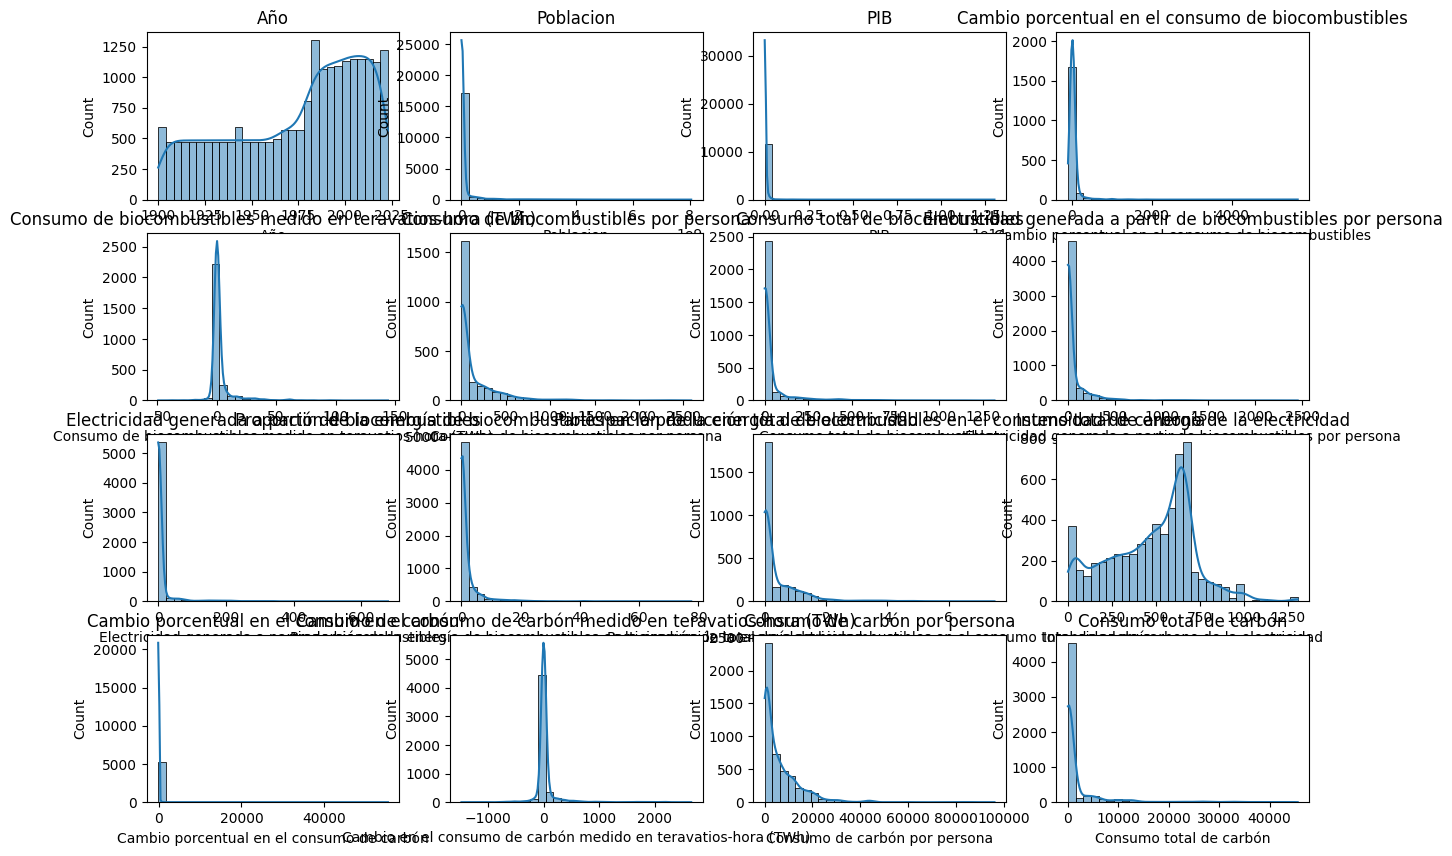

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset limpio
file_path = 'D:\\Documents\\GitHub\\world-energy-consumption\\cleaned\\energy_data_cleaned.csv'
dataset = pd.read_csv(file_path)

# Exploración de Datos
print("Información del dataset:")
print(dataset.info())

print("\nDescripción del dataset:")
print(dataset.describe(include='all'))  # Incluye también estadísticas de columnas no numéricas

# Visualización de la distribución de algunas columnas numéricas
numerical_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(dataset[column], bins=30, kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

# Limpieza de Datos
# Verificar valores nulos
print("\nValores nulos por columna:")
print(dataset.isnull().sum())

# Visualizar duplicados
duplicates = dataset.duplicated().sum()
print(f"\nNúmero de filas duplicadas: {duplicates}")

# Decidir cómo manejar valores nulos
# Por ejemplo, rellenar valores nulos con la media o eliminar filas
# Aquí eliminamos filas con valores nulos como ejemplo
dataset_cleaned = dataset.dropna()  # O puedes usar dataset.fillna(dataset.mean()) para rellenar

# Verificar los tipos de datos
print("\nTipos de datos después de la limpieza:")
print(dataset_cleaned.dtypes)

# Asegurarse de que los tipos de datos sean correctos, por ejemplo:
# Convertir 'Año' a tipo entero, si es necesario
dataset_cleaned['Año'] = dataset_cleaned['Año'].astype(int)

# Verificar de nuevo los tipos de datos
print("\nTipos de datos después de la conversión:")
print(dataset_cleaned.dtypes)

# Guardar el dataset limpio final
cleaned_file_path = 'D:\\Documents\\GitHub\\world-energy-consumption\\cleaned\\energy_data_final_cleaned.csv'
dataset_cleaned.to_csv(cleaned_file_path, index=False)
print(f"\nDataset limpio guardado en: {cleaned_file_path}")
